In [69]:
import json
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,GlobalMaxPooling1D,Flatten,Dropout,Bidirectional

In [98]:
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
tf.compat.v1.disable_eager_execution()

In [20]:
import io
import re
import string
import tqdm
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [46]:
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
with open('chat.json') as content:
    chat = json.load(content)

In [48]:
tags = []
inputs = []
responses={}
for intent in chat['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [49]:
data = pd.DataFrame({"inputs":inputs, "tags":tags})

In [56]:
#Shuffle DataFrame
data.sample(frac=1)

,inputs,tags
28,okay até depois,tchau
11,oi bom conhece-lo,saudacao
56,o que é uma doença mental?,doencamental
48,como eu me dirijo a você?,quem
86,quais sao as causas?,causas
...,...,...
46,seu nome?,quem
64,como saber se conheço alguem que tenha uma doe...,sinais
66,quais os tratamentos?,tratamentos
79,existe cura para problemas de saúde mental?,cura


In [88]:
onehotencoder = OneHotEncoder()
y_train = onehotencoder.fit_transform(data[['tags']]).todense()

In [89]:
type(y_train)

numpy.matrix

In [90]:
tokenizer = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
x_train = pad_sequences(train)

In [91]:
vocabulary = len(tokenizer.word_index)

In [92]:
vocabulary, x_train.shape, y_train.shape

(127, (101, 10), (101, 14))

In [94]:
x_train.shape[1]/2

5.0

In [100]:
#creating the model
model = tf.keras.Sequential()

model.add(Embedding(vocabulary, x_train.shape[1], mask_zero=True))
model.add(Bidirectional(LSTM(x_train.shape[1],  return_sequences=True)))
model.add(Bidirectional(LSTM(int(x_train.shape[1]/2))))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [101]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])


In [103]:
train = model.fit(x_train,y_train,epochs=300)

Train on 101 samples
Epoch 1/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3534 - accuracy: 0.9286
Epoch 2/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3555 - accuracy: 0.9286
Epoch 3/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3539 - accuracy: 0.9286
Epoch 4/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3550 - accuracy: 0.9286
Epoch 5/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3547 - accuracy: 0.9286
Epoch 6/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3505 - accuracy: 0.9286
Epoch 7/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3522 - accuracy: 0.9286
Epoch 8/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3479 - accuracy: 0.9286
Epoch 9/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3520 - accuracy: 0.9286
Epoch 10/300
101/101 [==============================

101/101 [==============================] - 0s 1ms/sample - loss: 0.3200 - accuracy: 0.9286
Epoch 80/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3247 - accuracy: 0.9286
Epoch 81/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3236 - accuracy: 0.9286
Epoch 82/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3210 - accuracy: 0.9286
Epoch 83/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3283 - accuracy: 0.9286
Epoch 84/300
101/101 [==============================] - 0s 991us/sample - loss: 0.3262 - accuracy: 0.9286
Epoch 85/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3245 - accuracy: 0.9286
Epoch 86/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3217 - accuracy: 0.9286
Epoch 87/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3227 - accuracy: 0.9286
Epoch 88/300
101/101 [==============================] - 0s 1ms/sample - los

101/101 [==============================] - 0s 1ms/sample - loss: 0.3042 - accuracy: 0.9286
Epoch 158/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3070 - accuracy: 0.9286
Epoch 159/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3006 - accuracy: 0.9286
Epoch 160/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3032 - accuracy: 0.9286
Epoch 161/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3044 - accuracy: 0.9286
Epoch 162/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3025 - accuracy: 0.9286
Epoch 163/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.2992 - accuracy: 0.9286
Epoch 164/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3119 - accuracy: 0.9286
Epoch 165/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.3044 - accuracy: 0.9286
Epoch 166/300
101/101 [==============================] - 0s 1ms/sampl

101/101 [==============================] - 0s 1ms/sample - loss: 0.2951 - accuracy: 0.9286
Epoch 236/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.2919 - accuracy: 0.9286
Epoch 237/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.2926 - accuracy: 0.9286
Epoch 238/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.2857 - accuracy: 0.9286
Epoch 239/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.2939 - accuracy: 0.9286
Epoch 240/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.2925 - accuracy: 0.9286
Epoch 241/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.2892 - accuracy: 0.9286
Epoch 242/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.2920 - accuracy: 0.9286
Epoch 243/300
101/101 [==============================] - 0s 1ms/sample - loss: 0.2879 - accuracy: 0.9286
Epoch 244/300
101/101 [==============================] - 0s 1ms/sampl

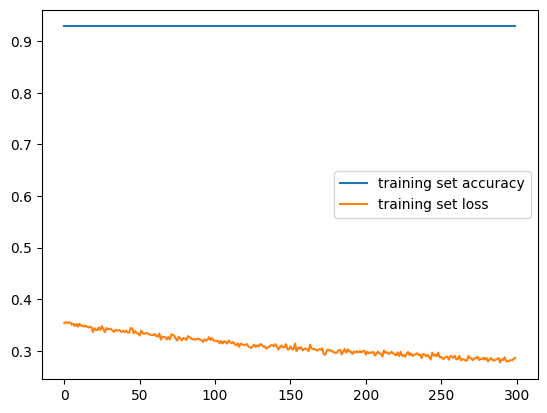

In [104]:
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()